<a href="https://colab.research.google.com/github/yohei0408/kikagaku/blob/main/20240930_%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E5%9F%BA%E7%A4%8E%E3%80%80%E7%AB%A0%E6%9C%AB%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('/content/income_and_expenditure.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [35]:
#Q1
numeric_df = df.select_dtypes(include=['number'])
# 相関行列の計算
correlation_matrix = numeric_df.corr()

# 'age' 列との相関が高い列を抽出
thi_corr = correlation_matrix["Total Household Income"].sort_values(ascending=False)

# 結果を表示
print(thi_corr)

Total Household Income                           1.000000
Communication Expenditure                        0.710140
Housing and water Expenditure                    0.676186
Miscellaneous Goods and Services Expenditure     0.666288
Total Food Expenditure                           0.663660
Transportation Expenditure                       0.639939
Clothing, Footwear and Other Wear Expenditure    0.605992
Imputed House Rental Value                       0.574091
Meat Expenditure                                 0.567142
Total Income from Entrepreneurial Acitivites     0.563662
Number of Personal Computer                      0.557561
Number of Airconditioner                         0.551994
Number of Car, Jeep, Van                         0.546663
Restaurant and hotels Expenditure                0.510017
Number of Cellular phone                         0.488106
Number of Television                             0.475170
Number of Refrigerator/Freezer                   0.473454
Fruit Expendit

In [34]:
import pandas as pd

# 'Expenditure' を含む列をフィルタリング
expenditure_columns = df.filter(regex="Expenditure").columns

# 列の数を数える
count_expenditure_columns = len(expenditure_columns)

# 結果を表示
print(f"'Expenditure' を含む列の数(Q2): {count_expenditure_columns}")


'Expenditure' を含む列の数(Q2): 18


In [33]:
import numpy as np
import pandas as pd

# Total Food Expenditure 列に対して対数変換を実行
log_total_food_expenditure = np.log1p(df['Total Food Expenditure'])

# 平均と標準偏差を計算
mean = log_total_food_expenditure.mean()
std = log_total_food_expenditure.std()

# 3σ 範囲を超えるデータを外れ値とみなす
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# 外れ値の数を数える
outliers = log_total_food_expenditure[(log_total_food_expenditure < lower_bound) | (log_total_food_expenditure > upper_bound)]
outlier_count = len(outliers)

# 結果を表示
print(f"外れ値とみなされるサンプル数(Q3): {outlier_count}")


外れ値とみなされるサンプル数(Q3): 204


In [9]:
# 外れ値に該当する行をフィルタ
outliers = (log_total_food_expenditure < lower_bound) | (log_total_food_expenditure > upper_bound)

# 外れ値を除外したデータフレームを作成
df_clean = df[~outliers]

# 結果を表示（もしくは df_clean を利用）
df_clean.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [10]:
df_clean.shape

(41340, 60)

In [11]:
df.shape

(41544, 60)

In [12]:
df3 = df[(mean - 3 * std <= df['Total Food Expenditure']) & (df['Total Food Expenditure'] <= mean + 3 * std)]
df3.shape

(0, 60)

In [14]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [15]:
t = df_clean['Total Household Income'].values
x = df_clean.filter(regex="Expenditure").values


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(x_train, t_train)

print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.6942756301639427
test score :  0.7476745106006721


In [29]:
x2 = df_clean.filter(regex="Expenditure")
x2.head()

,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure
0,117848,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,3457,4776,2880,36200,34056,7200
1,67766,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,3520,12900,5700,29300,9150,1500
2,61609,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,70,324,420,425,6450,500
3,78189,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,60,6840,660,300,3762,500
4,94625,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,140,6996,2100,0,8472,1000


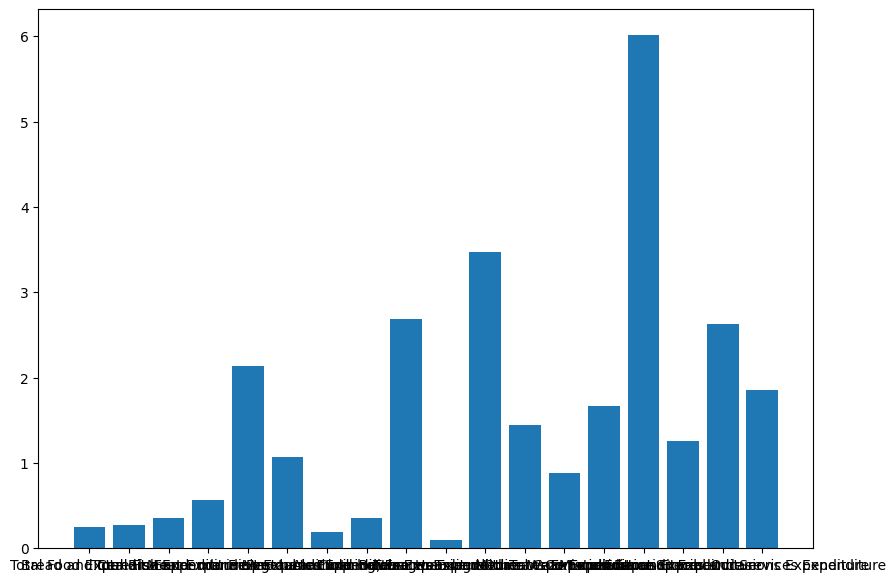

In [30]:
columns = x2.columns.tolist()
plt.figure(figsize=(10, 7))
plt.bar(x=columns, height=model.coef_);

In [36]:
#Q4
model.coef_

array([0.2505446 , 0.26978829, 0.35315171, 0.56220815, 2.13869543,
       1.06882473, 0.19170959, 0.35620858, 2.69146021, 0.0989722 ,
       3.4687923 , 1.4434285 , 0.88088416, 1.66450005, 6.01543358,
       1.25907293, 2.62770778, 1.8561693 ])